# MVP Análise de Dados e Boas Práticas
Nome: Elvio

Matrícula: 40530010055

Dataset: Wether

## Descrição do Problema
Ele oferece mais de 40 variáveis metereologicas, incluindo temperatura, vento, pressão, precipitação, umidade, visibilidade, medições de qualidade do ar e muito mais. O conjunto de dados é valioso para analisar padrões climáticos globais.

# Hipóteses do Problema

As hipóteses levantadas para esta análise são:

- Qual a previsão de temperatura para o Brasil para janeiro de 2030?

- Qual a sensação térmica para o Brasil para janeiro de 2030?

## Tipo de Problema

Este é um problema de **regressção preditiva**. Dado um conjunto de climático de diversos locais ao redor do globo, será utilizado para predição da temperatura e da sensação térmica para o Brasil, utilizando os modelos preditivo baseado em redes neurais.

# Seleção de Dados
O conjunto de dados foi obtido pelo Kaggle chamado World Weather Repository ( Daily Updating ) e é atualizado diariamente fornecendo uma base de dados para estudos climáticos.


## Atributos do Dataset

**Contem mais de 78136 medições de 41 parâmetros climáticos, que são:**

País: Nome do país onde os dados meteorológicos foram registrados.

Nome da Localização: Cidade ou local de referência da medição.

Latitude: Coordenada geográfica norte-sul da localização.

Longitude: Coordenada geográfica leste-oeste da localização.

Fuso Horário: Zona de tempo correspondente à localidade.

Última Atualização - Epoch: Data e hora da última atualização no formato epoch (segundos desde 1970).

Última Atualização: Data e hora da última atualização no formato padrão.

Temperatura em Celsius: Temperatura do ar em graus Celsius.

Temperatura em Fahrenheit: Temperatura do ar em graus Fahrenheit.

Condição Climática: Descrição textual do estado do tempo (ex: Ensolarado, Nublado).

Vento em mph: Velocidade do vento em milhas por hora.

Vento em km/h: Velocidade do vento em quilômetros por hora.

Direção do Vento em Graus: Direção do vento expressa em graus (0° = norte).

Direção do Vento: Direção cardinal do vento (ex: N, NE, S).

Pressão em mb: Pressão atmosférica em milibares.

Pressão em polegadas: Pressão atmosférica em polegadas de mercúrio.

Precipitação em mm: Quantidade de precipitação (chuva) em milímetros.

Precipitação em polegadas: Quantidade de precipitação em polegadas.

Umidade: Umidade relativa do ar em porcentagem.

Cobertura de Nuvens: Percentual de cobertura do céu por nuvens.

Sensação Térmica em Celsius: Temperatura aparente em °C, considerando fatores como vento e umidade.

Sensação Térmica em Fahrenheit: Temperatura aparente em °F.

Visibilidade em km: Distância de visibilidade em quilômetros.

Visibilidade em milhas: Distância de visibilidade em milhas.

Índice UV: Medida da intensidade da radiação ultravioleta do sol.

Rajada de Vento em mph: Velocidade de rajadas de vento em milhas por hora.

Rajada de Vento em km/h: Velocidade de rajadas de vento em quilômetros por hora.

Qualidade do Ar - Monóxido de Carbono: Concentração de CO no ar.

Qualidade do Ar - Ozônio: Concentração de ozônio (O₃) no ar.

Qualidade do Ar - Dióxido de Nitrogênio: Concentração de NO₂ no ar.

Qualidade do Ar - Dióxido de Enxofre: Concentração de SO₂ no ar.

Qualidade do Ar - Partículas PM2.5: Concentração de partículas muito finas no ar (menores que 2,5 micrômetros).

Qualidade do Ar - Partículas PM10: Concentração de partículas inaláveis (menores que 10 micrômetros).

Índice de Qualidade do Ar - EPA EUA: Classificação da qualidade do ar segundo a agência americana.

Índice de Qualidade do Ar - DEFRA Reino Unido: Classificação da qualidade do ar segundo o órgão britânico.

Nascer do Sol: Horário do nascer do sol.

Pôr do Sol: Horário do pôr do sol.

Nascer da Lua: Horário do nascimento da lua.

Pôr da Lua: Horário do desaparecimento da lua no horizonte.

Fase da Lua: Fase atual do ciclo lunar (ex: nova, cheia, minguante).

Iluminação da Lua: Percentual visível da lua iluminada.

# Importação das Bibliotecas Necessárias e Carga de Dados

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Carregamento correto do dataset usando o link raw
df = pd.read_csv('https://raw.githubusercontent.com/Ebmf/World-Weather-Repository/main/GlobalWeatherRepository.csv')

In [3]:
# Primeiras linhas
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


# Análise de Dados
Nesta etapa de Análise Exploratória de Dados (EDA) aplicada ao conjunto de dados climáticos, buscamos compreender a distribuição, as inter-relações e os comportamentos das variáveis meteorológicas, o que é essencial para as fases posteriores de pré-processamento e modelagem preditiva.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78136 entries, 0 to 78135
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       78136 non-null  object 
 1   location_name                 78136 non-null  object 
 2   latitude                      78136 non-null  float64
 3   longitude                     78136 non-null  float64
 4   timezone                      78136 non-null  object 
 5   last_updated_epoch            78136 non-null  int64  
 6   last_updated                  78136 non-null  object 
 7   temperature_celsius           78136 non-null  float64
 8   temperature_fahrenheit        78136 non-null  float64
 9   condition_text                78136 non-null  object 
 10  wind_mph                      78136 non-null  float64
 11  wind_kph                      78136 non-null  float64
 12  wind_degree                   78136 non-null  int64  
 13  w

O conjunto de dados analisado apresenta excelente qualidade, com **nenhum valor ausente** em nenhuma das 41 variáveis registradas, o que elimina a necessidade de imputação ou exclusão de registros. As variáveis estão bem definidas em termos de tipos de dados: campos como **temperatura, umidade, pressão, velocidade do vento e índices de qualidade do ar estão armazenados como valores numéricos** (float ou int), permitindo análises estatísticas e modelagens diretas. Já informações como nomes de **países, direções do vento e fases da lua estão corretamente categorizadas como variáveis do tipo texto** (object). Além disso,** variáveis temporais como “last_updated”, “sunrise”, “sunset”, “moonrise” e “moonset”** estão em formato de string, podendo ser facilmente convertidas para datetime, se necessário. A ausência de inconsistências e a padronização dos tipos de dados tornam este dataset altamente confiável para análises descritivas, preditivas e modelagens baseadas em séries temporais.

Dito isso será feita a matriz de correlação para identificar a relação entre as variaveis. Para essa etapa será selecionado somente os dados numéricos referentes ao clima de cada pais. Também foi definido o sistema internacional de medidas, ou seja, as colunas selecionadas serão as com a unidade de medida do sistema internacional.

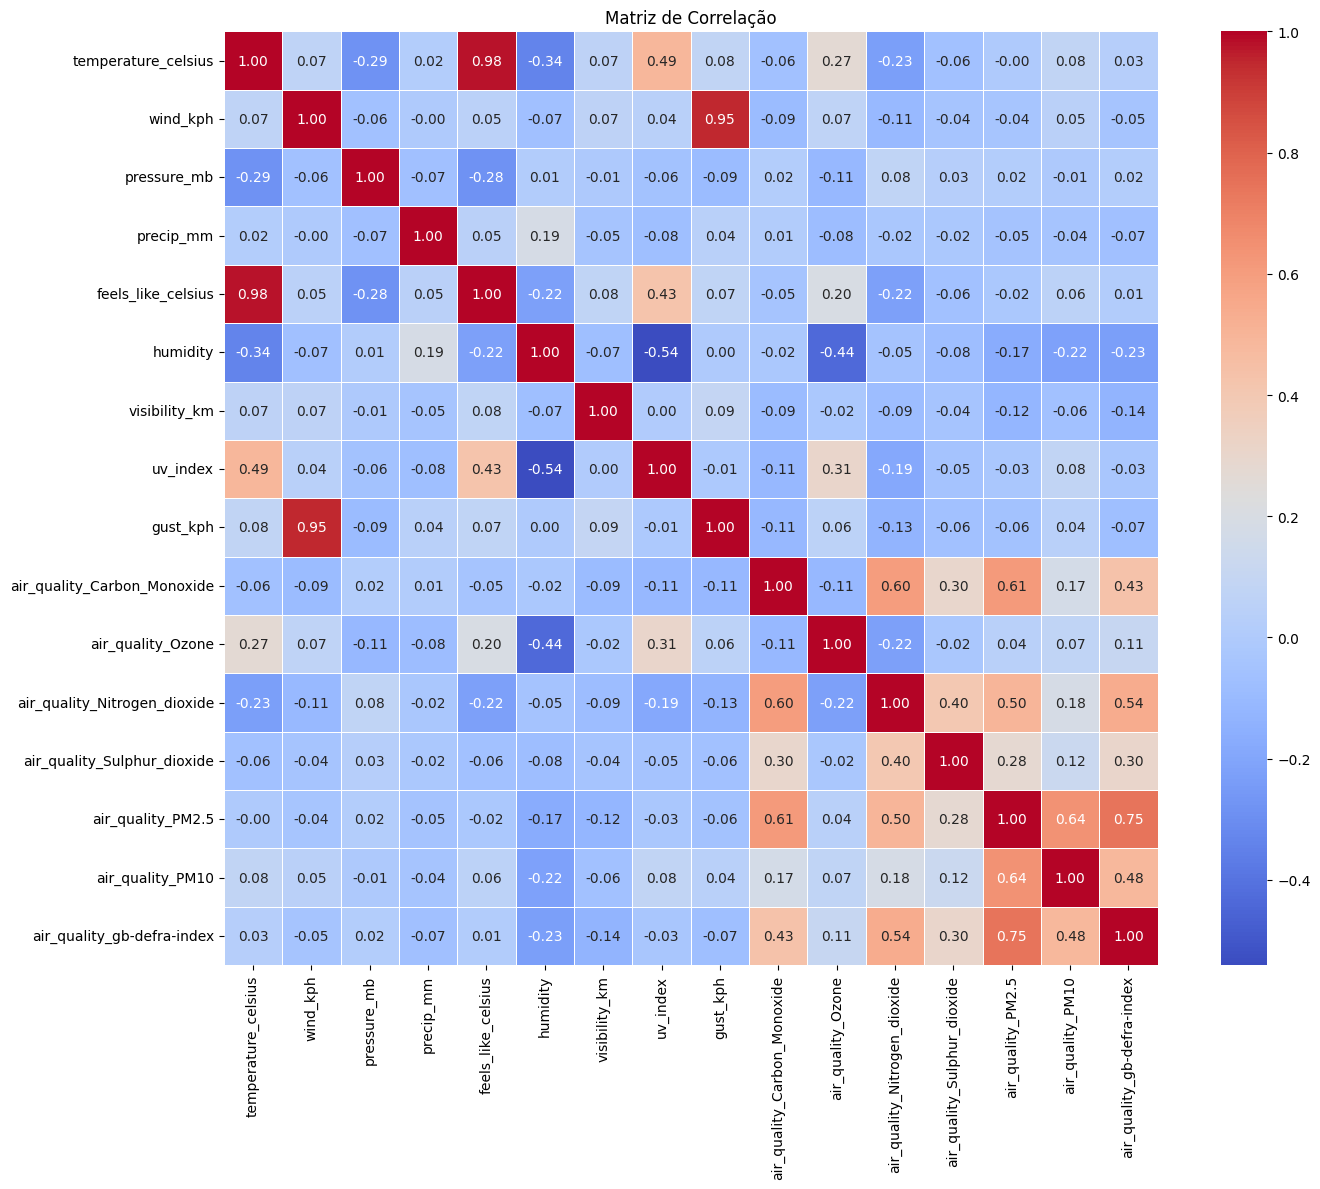

In [5]:
# Selecionar apenas colunas numéricas
df_numerico = df[['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 'feels_like_celsius','humidity','visibility_km', 'uv_index','gust_kph','air_quality_Carbon_Monoxide',
                  'air_quality_Ozone','air_quality_Nitrogen_dioxide','air_quality_Sulphur_dioxide','air_quality_PM2.5','air_quality_PM10','air_quality_gb-defra-index']]

# Calcular a matriz de correlação
matriz_correlacao = df_numerico.corr()

# Plotar com seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

A matriz de correlação apresenta a relação entre variáveis numéricas do conjunto de dados meteorológicos e de qualidade do ar. Observa-se uma correlação muito forte entre a temperatura em Celsius e a sensação térmica (feels_like_celsius), com valor de 0.98, o que é esperado, já que a sensação térmica depende diretamente da temperatura. Da mesma forma, a velocidade do vento (wind_kph) apresenta correlação de 0.95 com as rajadas de vento (gust_kph), reforçando a ligação entre essas variáveis.

Os poluentes do ar também mostram correlações relevantes. As partículas PM2.5 e PM10 têm correlação forte entre si (0.75), e ambas estão fortemente relacionadas ao índice britânico de qualidade do ar (air_quality_gb-defra-index), indicando que essas partículas têm grande influência na avaliação da poluição. Além disso, o monóxido de carbono apresenta correlação moderada com outros poluentes como dióxido de nitrogênio e partículas em suspensão.

Entre as correlações negativas, destaca-se a relação inversa entre umidade (humidity) e índice UV (uv_index), com valor de -0.54, o que faz sentido, pois maior umidade costuma estar associada a maior cobertura de nuvens, reduzindo a radiação ultravioleta. A umidade também mostra correlação negativa com a temperatura, o que pode refletir características climáticas locais.

Agora será analisado a distribuição de frequencia das variáveis que serão preditas, para identificar padrões e analisar o

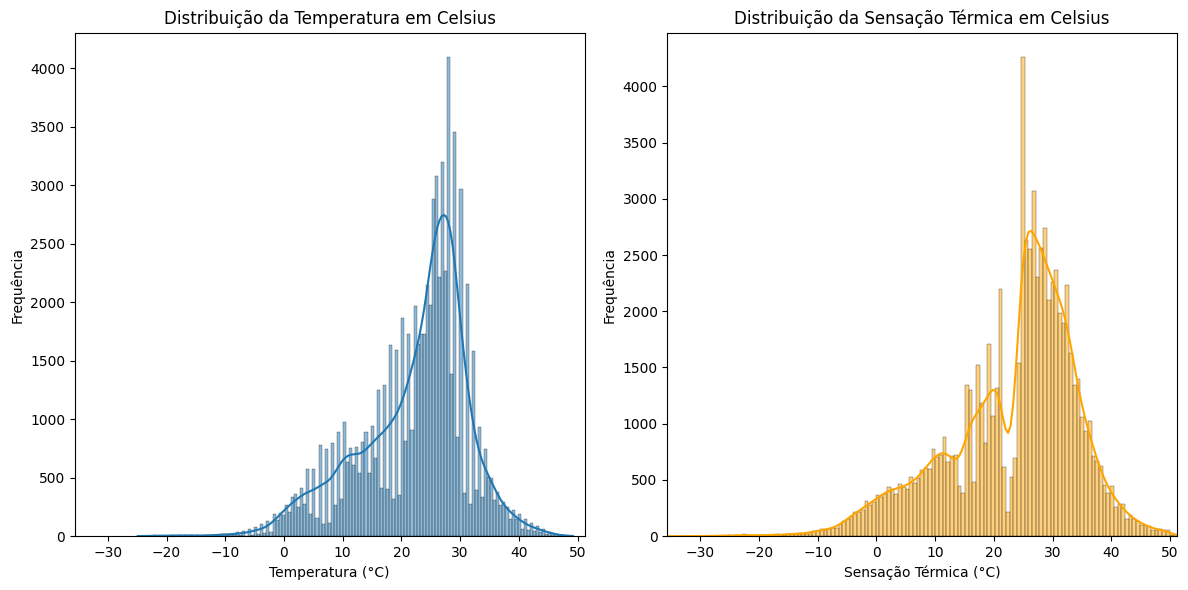

In [6]:
# cópia do dataframe original
df2 = df.copy()
#seleção das colunas
# transformação da coluna last_updated em datetime
df2['last_updated'] = pd.to_datetime(df2['last_updated'])

# Define os limites dos eixos X com base no intervalo total das duas colunas
x_min = min(df2['temperature_celsius'].min(), df2['feels_like_celsius'].min())
x_max = max(df2['temperature_celsius'].max(), df2['feels_like_celsius'].max())
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df2['temperature_celsius'], kde=True)
plt.title('Distribuição da Temperatura em Celsius')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.xlim(x_min, x_max)

plt.subplot(1, 2, 2)
sns.histplot(df2['feels_like_celsius'], kde=True, color='orange')
plt.title('Distribuição da Sensação Térmica em Celsius')
plt.xlabel('Sensação Térmica (°C)')
plt.ylabel('Frequência')
plt.xlim(x_min, x_max)

plt.tight_layout()
plt.show()


Os gráficos mostram que ambas as variáveis apresentam uma concentração principal de dados entre 20 °C e 30 °C. No entanto, a temperatura apresenta uma curva de densidade mais definida, com um pico acentuado próximo a 25 °C. Já a sensação térmica exibe três picos distintos, aproximadamente nas temperaturas de 10 °C, 20 °C e 25 °C. Além disso, observa-se que a curva da sensação térmica possui uma cauda mais alongada, sugerindo que, em determinadas condições climáticas, o desconforto térmico pode diferir significativamente da temperatura real medida.

Para extrair informações mais relevantes dessas variáveis, foi realizada uma análise estatística descritiva, incluindo medidas como média, mediana, desvio padrão, mínimo e máximo. Essa análise permitiu compreender melhor a dispersão, tendência central e variação dos dados, fornecendo uma base sólida para interpretações mais precisas sobre o comportamento da temperatura e da sensação térmica em diferentes condições climáticas.

In [7]:
# estatísticas descritivas básicas do dataset
df2[['temperature_celsius', 'feels_like_celsius']].describe()

,temperature_celsius,feels_like_celsius
count,78136.000000,78136.000000
mean,22.349319,23.297123
std,9.266674,11.040116
min,-24.900000,-35.600000
25%,17.100000,17.100000
50%,24.700000,25.800000
75%,28.300000,30.700000
max,49.200000,51.200000


A análise revela que consideradas 78.136 observações para cada variável, temperatura média registrada foi de aproximadamente 22,3 °C, enquanto a sensação térmica média foi ligeiramente maior, em torno de 23,3 °C. A variabilidade dos dados, representada pelo desvio padrão, é maior na sensação térmica (11,0 °C) do que na temperatura (9,3 °C), indicando que as sensações térmicas apresentaram maior dispersão. As temperaturas mínimas observadas foram bastante baixas, chegando a -24,9 °C para a temperatura e -35,6 °C para a sensação térmica, enquanto as máximas foram elevadas, atingindo 49,2 °C e 51,2 °C, respectivamente.

# Modelo Preditivo

Após a conclusão da etapa de análise estatística descritiva, iniciou-se a fase de construção do modelo preditivo.

O código permite ao usuário escolher um país a partir de dados climáticos e, com base nessa seleção, filtra o conjunto de dados. Em seguida, prepara as variáveis de entrada (como data, vento, pressão, umidade e qualidade do ar) e as saídas (temperatura real e sensação térmica). Os dados são normalizados e divididos em treino e teste. Por fim, o código utiliza GridSearchCV para encontrar os melhores hiperparâmetros de uma rede neural (MLPRegressor) e treina o modelo ideal para prever as temperaturas do país escolhido.

O codigo permite escolher o país que se deseja treinar o modelo é uma vantagem importante porque permite personalizar o modelo preditivo para as características climáticas específicas daquela região. Cada país pode apresentar padrões distintos de temperatura, umidade, vento e poluição do ar, influenciados por fatores geográficos, sazonais e ambientais.

Ao treinar o modelo apenas com dados de um país, ele se torna mais preciso e adaptado à realidade local, evitando que padrões de outros países (com climas totalmente diferentes) prejudiquem a aprendizagem. Isso melhora o desempenho do modelo, reduz o erro nas previsões e torna os resultados mais confiáveis para aplicações práticas, como alertas climáticos, planejamento agrícola ou estudos ambientais regionais.

In [25]:
# 1. Converter o timestamp para datetime
df2['last_updated'] = pd.to_datetime(df2['last_updated_epoch'], unit='s')

# 2. Mostrar os países disponíveis
paises = df2['country'].unique()
print("Países disponíveis:")
for i, pais in enumerate(paises):
    print(f"{i+1} - {pais}")

# 3. Selecionar o país via input()
escolha = input("Digite o número do país desejado: ")
try:
    index = int(escolha) - 1
    if 0 <= index < len(paises):
        pais_escolhido = paises[index]
        print(f"\nVocê escolheu: {pais_escolhido}")
    else:
        print("Número inválido.")
        exit()
except ValueError:
    print("Entrada inválida. Por favor, digite um número.")
    exit()

# 4. Filtrar o país escolhido
df_pais = df2[df2['country'] == pais_escolhido].copy()

# 5. Extrair features de tempo
df_pais['year'] = df_pais['last_updated'].dt.year
df_pais['month'] = df_pais['last_updated'].dt.month
df_pais['day'] = df_pais['last_updated'].dt.day

# 6. Selecionar features (entradas) e targets (saídas)
features = ['year', 'month', 'day', 'wind_kph', 'pressure_mb', 'precip_mm',
            'humidity', 'visibility_km', 'uv_index', 'gust_kph',
            'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
            'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
            'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_gb-defra-index']

# Verificar se todas as colunas estão presentes
missing_cols = [col for col in features + ['temperature_celsius', 'feels_like_celsius'] if col not in df_pais.columns]
if missing_cols:
    print(f"Colunas ausentes no dataset para {pais_escolhido}: {missing_cols}")
    exit()

X = df_pais[features]
y = df_pais[['temperature_celsius', 'feels_like_celsius']]

# 7. Escalar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 8. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 9. Buscar melhores hiperparâmetros com GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(32, 32), (64, 64), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'max_iter': [500],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(
    mlp,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=0,
    n_jobs=-1
)

print("Buscando melhores hiperparâmetros...")
grid_search.fit(X_train, y_train)

# Obter o melhor modelo
best_model = grid_search.best_estimator_

# Treinar novamente com o melhor modelo (opcional, pois já treinado no fit acima)
best_model.fit(X_train, y_train)

print("Melhores hiperparâmetros encontrados:", grid_search.best_params_)
print("Modelo treinado com sucesso para o país:", pais_escolhido)


Países disponíveis:
1 - Afghanistan
2 - Albania
3 - Algeria
4 - Andorra
5 - Angola
6 - Antigua and Barbuda
7 - Argentina
8 - Armenia
9 - Australia
10 - Austria
11 - Azerbaijan
12 - Bahamas
13 - Bahrain
14 - Bangladesh
15 - Barbados
16 - Belarus
17 - Belgium
18 - Belize
19 - Benin
20 - Bhutan
21 - Bolivia
22 - Bosnia and Herzegovina
23 - Botswana
24 - Brazil
25 - Brunei Darussalam
26 - Bulgaria
27 - Burkina Faso
28 - Burundi
29 - Madagascar
30 - Cape Verde
31 - Cambodia
32 - Cameroon
33 - Canada
34 - Central African Republic
35 - Chad
36 - Chile
37 - China
38 - Comoros
39 - Congo
40 - Costa Rica
41 - Croatia
42 - Cuba
43 - Cyprus
44 - Czech Republic
45 - Democratic Republic of Congo
46 - Denmark
47 - Djibouti
48 - Dominica
49 - Dominican Republic
50 - Ecuador
51 - Egypt
52 - El Salvador
53 - Equatorial Guinea
54 - Eritrea
55 - Estonia
56 - Swaziland
57 - Ethiopia
58 - Fiji Islands
59 - Finland
60 - France
61 - Gabon
62 - Gambia
63 - Georgia
64 - Germany
65 - Ghana
66 - Greece
67 - Grena

In [26]:
# Fazer previsões com o conjunto de teste
y_pred_scaled = best_model.predict(X_test)

# Desescalar (voltar ao valor original)
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)

# Calcular métricas
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

# Mostrar os resultados
print("\nAvaliação do Modelo:")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinação): {r2:.4f}")



Avaliação do Modelo:
RMSE (Raiz do Erro Quadrático Médio): 1.21
R²   (Coeficiente de Determinação): 0.8774


Com um R² de aproximadamente 0,88, os resultados indicam que o modelo é capaz de explicar 88% da variação nas temperaturas reais, o que representa um excelente desempenho para esse tipo de aplicação. As demais métricas confirmam que o erro médio é baixo, reforçando a confiabilidade do modelo em prever temperatura e sensação térmica com boa precisão. No caso deste modelo, o RMSE foi de 1.21 °C, o que é considerado um erro pequeno, especialmente se comparado ao intervalo total das temperaturas observadas.

Nesse caso o modelo apresentou aceitável devida a complexidade de predição da temperatura e da sensação de temperatura.

Após definir a estrutura do modelo foi avaliado uma situação hipotética, onde escolheu-se o Brasil para avaliar a situação da temperatura e sensação térmica no mês de janeiro de 2030.

In [27]:
# Simular entrada: Brasil em 1º de janeiro de 2030
entrada = pd.DataFrame([{
    'year': 2030,
    'month': 1,
    'day': 1,
    'wind_kph': 10,
    'pressure_mb': 1013,
    'precip_mm': 2,
    'humidity': 70,
    'visibility_km': 10,
    'uv_index': 5,
    'gust_kph': 12,
    'air_quality_Carbon_Monoxide': 0.4,
    'air_quality_Ozone': 20,
    'air_quality_Nitrogen_dioxide': 10,
    'air_quality_Sulphur_dioxide': 4,
    'air_quality_PM2.5': 13,
    'air_quality_PM10': 22,
    'air_quality_gb-defra-index': 3
}])

# 1. Aplicar o mesmo escalonamento usado no treino
entrada_scaled = scaler_X.transform(entrada)

# 2. Fazer a previsão
pred_scaled = best_model.predict(entrada_scaled)

# 3. Desescalar a previsão para valores reais
pred_real = scaler_y.inverse_transform(pred_scaled)

# 4. Exibir resultado
print(f"Temperatura prevista: {pred_real[0][0]:.2f} °C")
print(f"Sensação térmica prevista: {pred_real[0][1]:.2f} °C")


Temperatura prevista: 31.53 °C
Sensação térmica prevista: 32.69 °C
